In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# macOS용 한글 폰트 설정

# macOS에서 사용 가능한 한글 폰트들
macos_korean_fonts = [
    '/System/Library/Fonts/AppleGothic.ttf',
    '/System/Library/Fonts/AppleSDGothicNeo.ttc',
    '/Library/Fonts/NanumGothic.ttf',
    '/Library/Fonts/NanumBarunGothic.ttf',
    '/System/Library/Fonts/PingFang.ttc'
]

# 사용 가능한 폰트 찾기
available_font = None
for font_path in macos_korean_fonts:
    if os.path.exists(font_path):
        available_font = font_path
        print(f"사용 가능한 폰트 발견: {font_path}")
        break

if available_font:
    # 폰트 설정
    font_prop = fm.FontProperties(fname=available_font)
    plt.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['axes.unicode_minus'] = False
    print(f"폰트 설정 완료: {font_prop.get_name()}")
else:
    # 기본 폰트로 설정
    plt.rcParams['font.family'] = 'AppleGothic'
    plt.rcParams['axes.unicode_minus'] = False
    print("기본 AppleGothic 폰트 사용")

사용 가능한 폰트 발견: /System/Library/Fonts/AppleSDGothicNeo.ttc
폰트 설정 완료: Apple SD Gothic Neo


In [3]:
# 데이터 로드
bsi_df = pd.read_csv('../01_data_analysis/데이터_전처리후/11_소상공인_경기동향(BSI)현황/소상공인_경기동향(BSI)현황.csv')

print("=== 데이터 로드 완료 ===")
print(f"BSI 데이터: {bsi_df.shape}")
print()

# 데이터 미리보기
print("=== BSI 데이터 미리보기 ===")
print(bsi_df.head())
print()

=== 데이터 로드 완료 ===
BSI 데이터: (113, 58)

=== BSI 데이터 미리보기 ===
     연도  월  경기전반체감  경기전반전망  매출체감   매출전망  자금사정체감  자금사정전망  소매업체감  소매업전망  ...  \
0  2016  1    64.6    76.2  67.9   75.9    69.1    75.3   65.3   71.1  ...   
1  2016  2    77.9    86.3  77.3   85.5    78.1    84.8   86.9   93.8  ...   
2  2016  3    82.3   111.1  83.7  110.9    82.9   108.9   81.1  109.0  ...   
3  2016  4    81.3   106.3  82.5  106.8    81.2   104.7   81.4  109.7  ...   
4  2016  5    75.1   102.8  75.9  102.7    75.3   100.9   80.0  112.3  ...   

   전북체감   전북전망  전남체감   전남전망  경북체감   경북전망  경남체감   경남전망  제주체감   제주전망  
0  72.0   82.3  59.1   71.1  69.1   80.9  65.7   78.8  70.8   77.8  
1  79.7   94.0  72.0   80.2  82.6   91.1  79.4   83.3  80.6   98.6  
2  82.8  112.5  75.0  105.2  86.2  108.5  78.8  112.7  91.7  107.6  
3  83.6  105.2  76.7  105.2  80.1  103.9  82.7  107.2  88.2  107.6  
4  79.7  106.9  70.3  103.0  73.0   95.4  69.3   99.3  89.6  114.6  

[5 rows x 58 columns]



=== 1. 전체 경기동향 추이 분석 ===


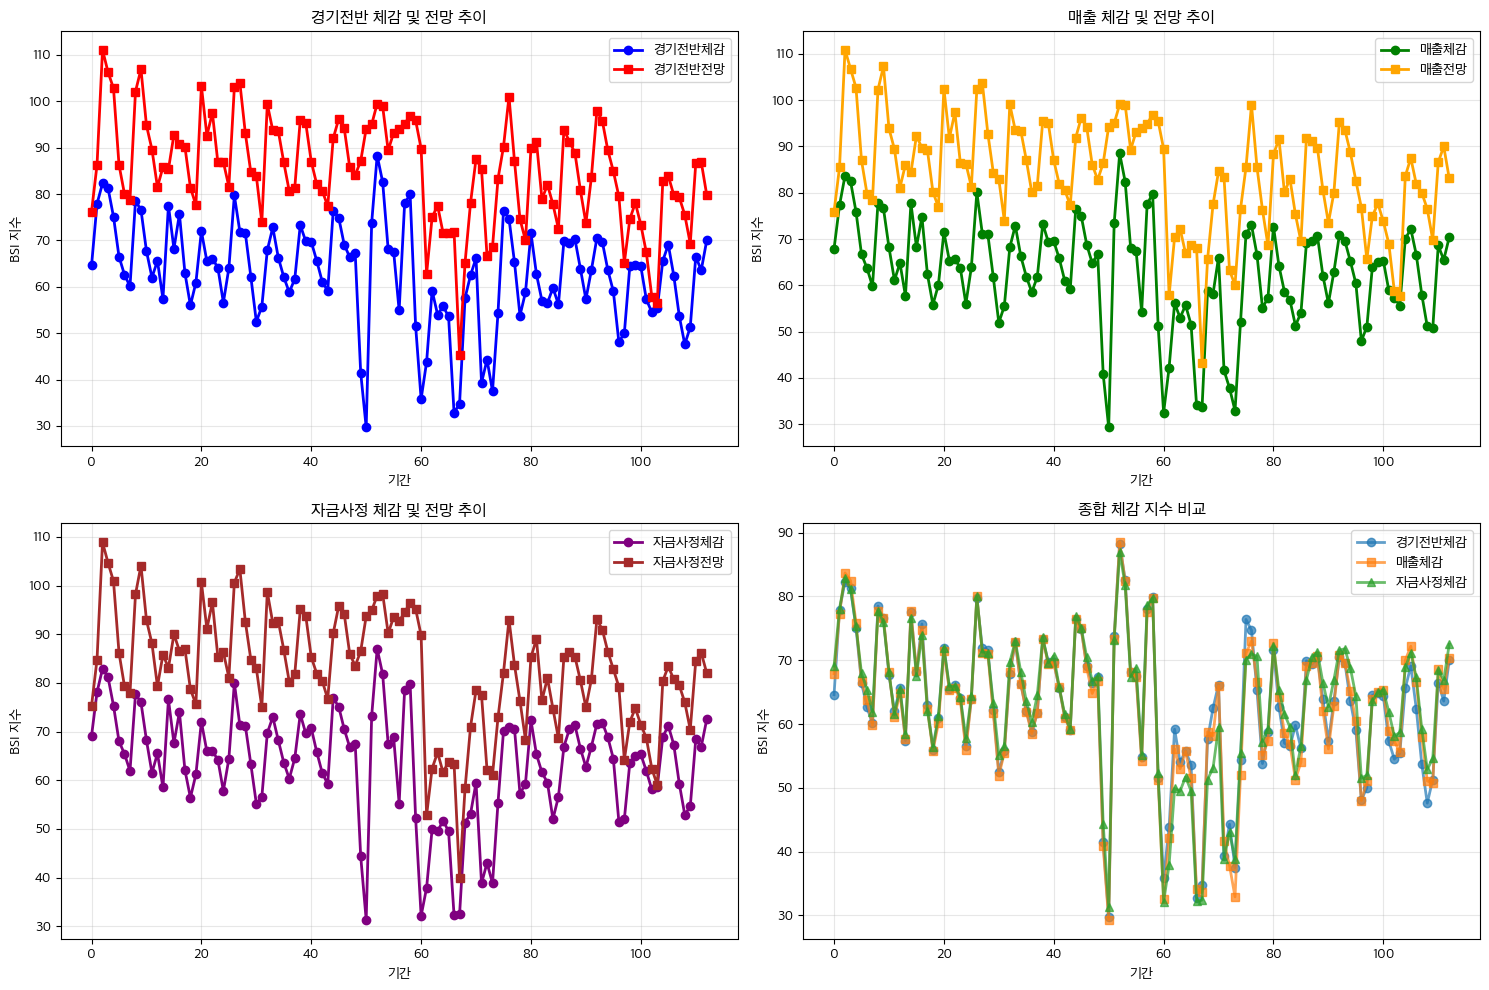

전체 기간 평균 BSI:
경기전반체감: 62.9
경기전반전망: 85.1
매출체감: 62.8
매출전망: 84.4
자금사정체감: 63.4
자금사정전망: 82.8



In [4]:
# 1. 전체 경기동향 추이 분석
def analyze_overall_business_trends():
    print("=== 1. 전체 경기동향 추이 분석 ===")
    
    # 시각화
    plt.figure(figsize=(15, 10))
    
    # 1-1. 경기전반 체감과 전망
    plt.subplot(2, 2, 1)
    plt.plot(bsi_df.index, bsi_df['경기전반체감'], marker='o', label='경기전반체감', linewidth=2, color='blue')
    plt.plot(bsi_df.index, bsi_df['경기전반전망'], marker='s', label='경기전반전망', linewidth=2, color='red')
    plt.title('경기전반 체감 및 전망 추이', fontweight='bold')
    plt.xlabel('기간')
    plt.ylabel('BSI 지수')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 1-2. 매출 체감과 전망
    plt.subplot(2, 2, 2)
    plt.plot(bsi_df.index, bsi_df['매출체감'], marker='o', label='매출체감', linewidth=2, color='green')
    plt.plot(bsi_df.index, bsi_df['매출전망'], marker='s', label='매출전망', linewidth=2, color='orange')
    plt.title('매출 체감 및 전망 추이', fontweight='bold')
    plt.xlabel('기간')
    plt.ylabel('BSI 지수')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 1-3. 자금사정 체감과 전망
    plt.subplot(2, 2, 3)
    plt.plot(bsi_df.index, bsi_df['자금사정체감'], marker='o', label='자금사정체감', linewidth=2, color='purple')
    plt.plot(bsi_df.index, bsi_df['자금사정전망'], marker='s', label='자금사정전망', linewidth=2, color='brown')
    plt.title('자금사정 체감 및 전망 추이', fontweight='bold')
    plt.xlabel('기간')
    plt.ylabel('BSI 지수')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 1-4. 종합 비교
    plt.subplot(2, 2, 4)
    plt.plot(bsi_df.index, bsi_df['경기전반체감'], marker='o', label='경기전반체감', linewidth=2, alpha=0.7)
    plt.plot(bsi_df.index, bsi_df['매출체감'], marker='s', label='매출체감', linewidth=2, alpha=0.7)
    plt.plot(bsi_df.index, bsi_df['자금사정체감'], marker='^', label='자금사정체감', linewidth=2, alpha=0.7)
    plt.title('종합 체감 지수 비교', fontweight='bold')
    plt.xlabel('기간')
    plt.ylabel('BSI 지수')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 통계 출력
    print("전체 기간 평균 BSI:")
    print(f"경기전반체감: {bsi_df['경기전반체감'].mean():.1f}")
    print(f"경기전반전망: {bsi_df['경기전반전망'].mean():.1f}")
    print(f"매출체감: {bsi_df['매출체감'].mean():.1f}")
    print(f"매출전망: {bsi_df['매출전망'].mean():.1f}")
    print(f"자금사정체감: {bsi_df['자금사정체감'].mean():.1f}")
    print(f"자금사정전망: {bsi_df['자금사정전망'].mean():.1f}")
    print()

analyze_overall_business_trends()

=== 2. 업종별 경기동향 분석 ===


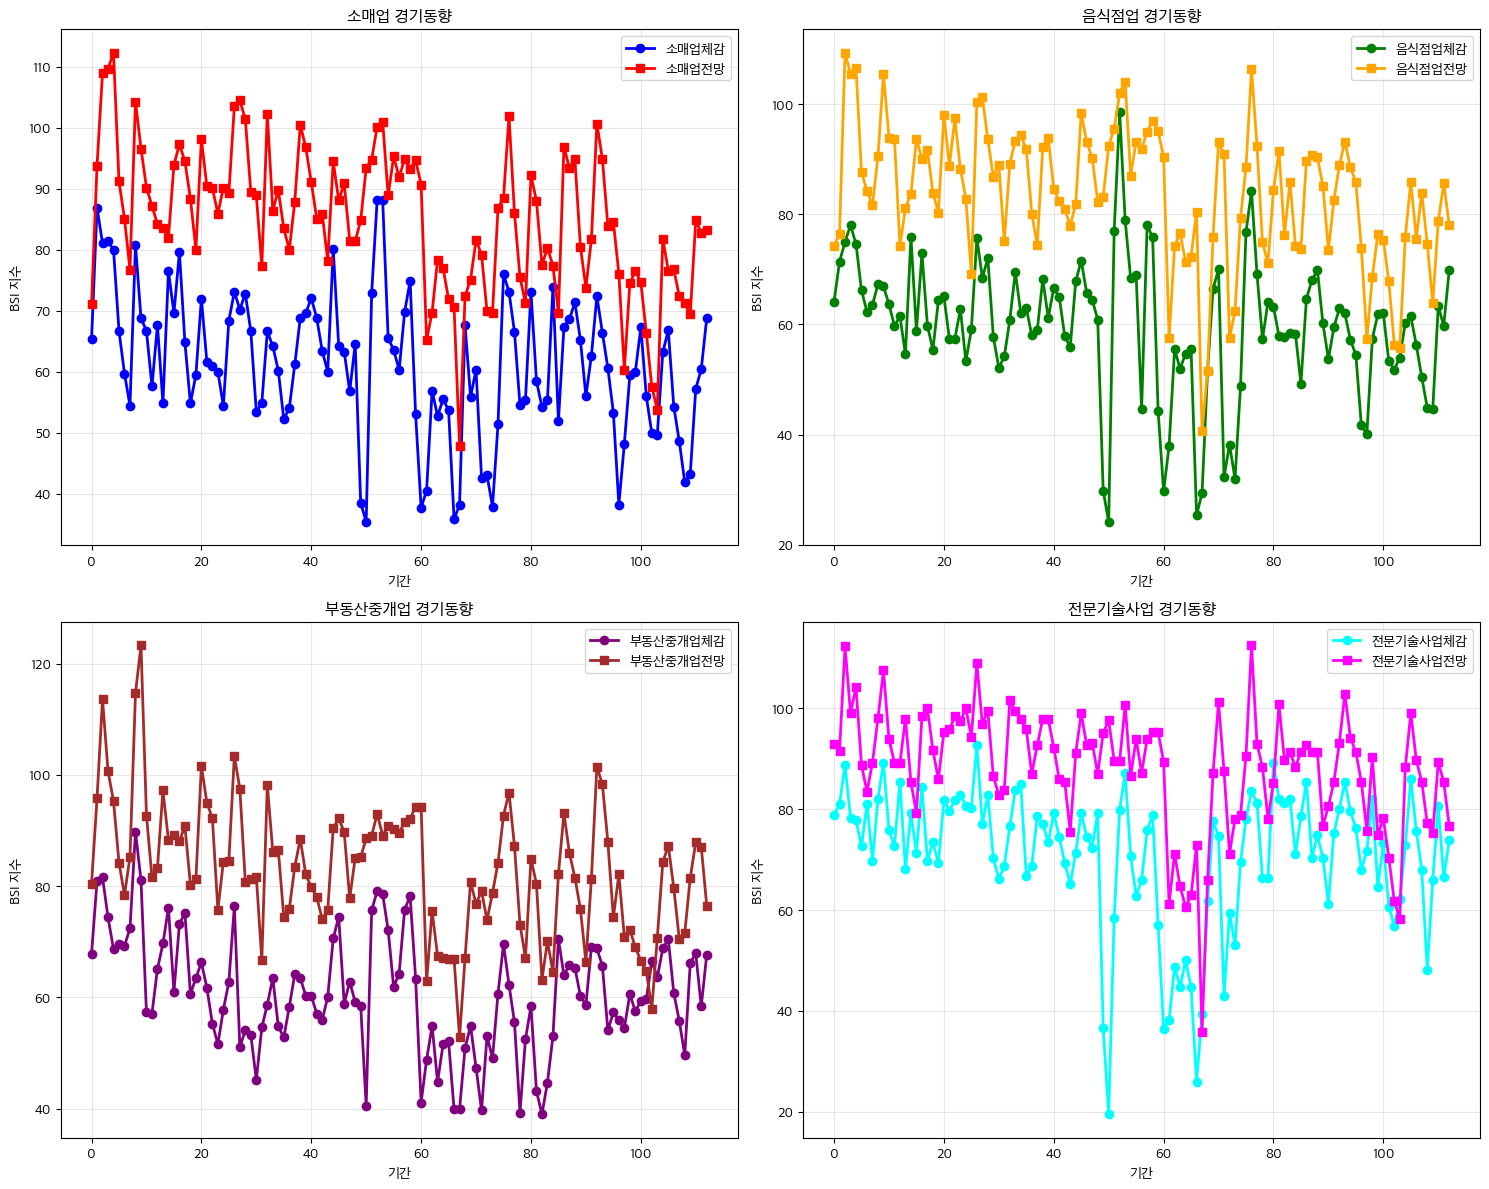

업종별 평균 BSI:
소매업체감: 61.5
음식점업체감: 59.6
부동산중개업체감: 60.9
전문기술사업체감: 71.0
교육서비스업체감: 75.2
수리업체감: 60.5
개인서비스업체감: 63.6



In [5]:
# 2. 업종별 경기동향 분석
def analyze_industry_trends():
    print("=== 2. 업종별 경기동향 분석 ===")
    
    # 업종별 컬럼 추출
    industry_columns = [col for col in bsi_df.columns if '업' in col and '체감' in col]
    
    # 시각화
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1-1. 소매업
    axes[0,0].plot(bsi_df.index, bsi_df['소매업체감'], marker='o', label='소매업체감', linewidth=2, color='blue')
    axes[0,0].plot(bsi_df.index, bsi_df['소매업전망'], marker='s', label='소매업전망', linewidth=2, color='red')
    axes[0,0].set_title('소매업 경기동향', fontweight='bold')
    axes[0,0].set_xlabel('기간')
    axes[0,0].set_ylabel('BSI 지수')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # 1-2. 음식점업
    axes[0,1].plot(bsi_df.index, bsi_df['음식점업체감'], marker='o', label='음식점업체감', linewidth=2, color='green')
    axes[0,1].plot(bsi_df.index, bsi_df['음식점업전망'], marker='s', label='음식점업전망', linewidth=2, color='orange')
    axes[0,1].set_title('음식점업 경기동향', fontweight='bold')
    axes[0,1].set_xlabel('기간')
    axes[0,1].set_ylabel('BSI 지수')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # 1-3. 부동산중개업
    axes[1,0].plot(bsi_df.index, bsi_df['부동산중개업체감'], marker='o', label='부동산중개업체감', linewidth=2, color='purple')
    axes[1,0].plot(bsi_df.index, bsi_df['부동산중개업전망'], marker='s', label='부동산중개업전망', linewidth=2, color='brown')
    axes[1,0].set_title('부동산중개업 경기동향', fontweight='bold')
    axes[1,0].set_xlabel('기간')
    axes[1,0].set_ylabel('BSI 지수')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # 1-4. 전문기술사업
    axes[1,1].plot(bsi_df.index, bsi_df['전문기술사업체감'], marker='o', label='전문기술사업체감', linewidth=2, color='cyan')
    axes[1,1].plot(bsi_df.index, bsi_df['전문기술사업전망'], marker='s', label='전문기술사업전망', linewidth=2, color='magenta')
    axes[1,1].set_title('전문기술사업 경기동향', fontweight='bold')
    axes[1,1].set_xlabel('기간')
    axes[1,1].set_ylabel('BSI 지수')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 업종별 평균 BSI
    print("업종별 평균 BSI:")
    for col in industry_columns:
        if '체감' in col:
            print(f"{col}: {bsi_df[col].mean():.1f}")
    print()

analyze_industry_trends()

=== 3. 지역별 경기동향 분석 ===


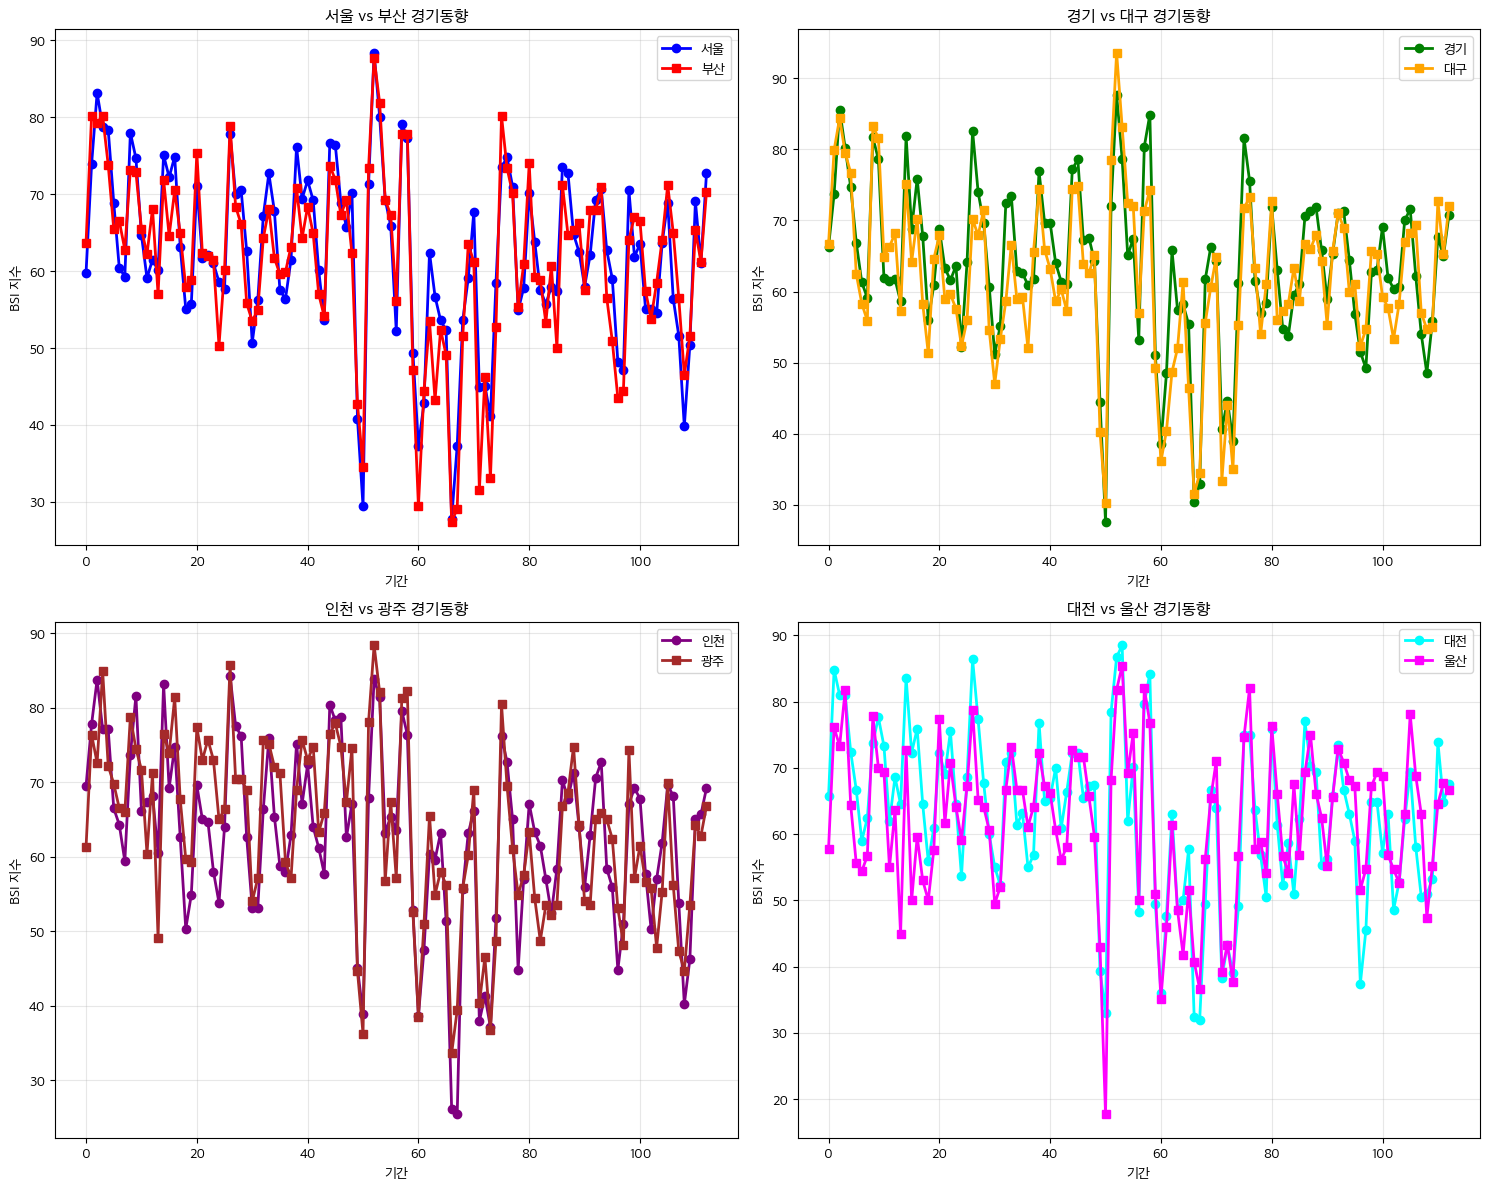

지역별 평균 BSI:
경기전반체감: 62.9
서울체감: 62.3
부산체감: 61.4
대구체감: 61.7
인천체감: 62.8
광주체감: 63.5
대전체감: 62.8
울산체감: 61.9
세종체감: 66.1
경기체감: 63.6
강원체감: 64.6
충북체감: 63.6
충남체감: 63.3
전북체감: 63.4
전남체감: 62.6
경북체감: 62.9
경남체감: 61.9
제주체감: 64.8



In [6]:
# 3. 지역별 경기동향 분석
def analyze_regional_trends():
    print("=== 3. 지역별 경기동향 분석 ===")
    
    # 지역별 컬럼 추출
    regional_columns = [col for col in bsi_df.columns if any(region in col for region in ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']) and '체감' in col]
    
    # 시각화
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 주요 지역들만 선택
    major_regions = ['서울체감', '부산체감', '경기체감', '대구체감']
    
    # 1-1. 서울 vs 부산
    axes[0,0].plot(bsi_df.index, bsi_df['서울체감'], marker='o', label='서울', linewidth=2, color='blue')
    axes[0,0].plot(bsi_df.index, bsi_df['부산체감'], marker='s', label='부산', linewidth=2, color='red')
    axes[0,0].set_title('서울 vs 부산 경기동향', fontweight='bold')
    axes[0,0].set_xlabel('기간')
    axes[0,0].set_ylabel('BSI 지수')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # 1-2. 경기 vs 대구
    axes[0,1].plot(bsi_df.index, bsi_df['경기체감'], marker='o', label='경기', linewidth=2, color='green')
    axes[0,1].plot(bsi_df.index, bsi_df['대구체감'], marker='s', label='대구', linewidth=2, color='orange')
    axes[0,1].set_title('경기 vs 대구 경기동향', fontweight='bold')
    axes[0,1].set_xlabel('기간')
    axes[0,1].set_ylabel('BSI 지수')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # 1-3. 인천 vs 광주
    axes[1,0].plot(bsi_df.index, bsi_df['인천체감'], marker='o', label='인천', linewidth=2, color='purple')
    axes[1,0].plot(bsi_df.index, bsi_df['광주체감'], marker='s', label='광주', linewidth=2, color='brown')
    axes[1,0].set_title('인천 vs 광주 경기동향', fontweight='bold')
    axes[1,0].set_xlabel('기간')
    axes[1,0].set_ylabel('BSI 지수')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # 1-4. 대전 vs 울산
    axes[1,1].plot(bsi_df.index, bsi_df['대전체감'], marker='o', label='대전', linewidth=2, color='cyan')
    axes[1,1].plot(bsi_df.index, bsi_df['울산체감'], marker='s', label='울산', linewidth=2, color='magenta')
    axes[1,1].set_title('대전 vs 울산 경기동향', fontweight='bold')
    axes[1,1].set_xlabel('기간')
    axes[1,1].set_ylabel('BSI 지수')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 지역별 평균 BSI
    print("지역별 평균 BSI:")
    for col in regional_columns:
        print(f"{col}: {bsi_df[col].mean():.1f}")
    print()

analyze_regional_trends()

=== 4. 연도별 분석 ===


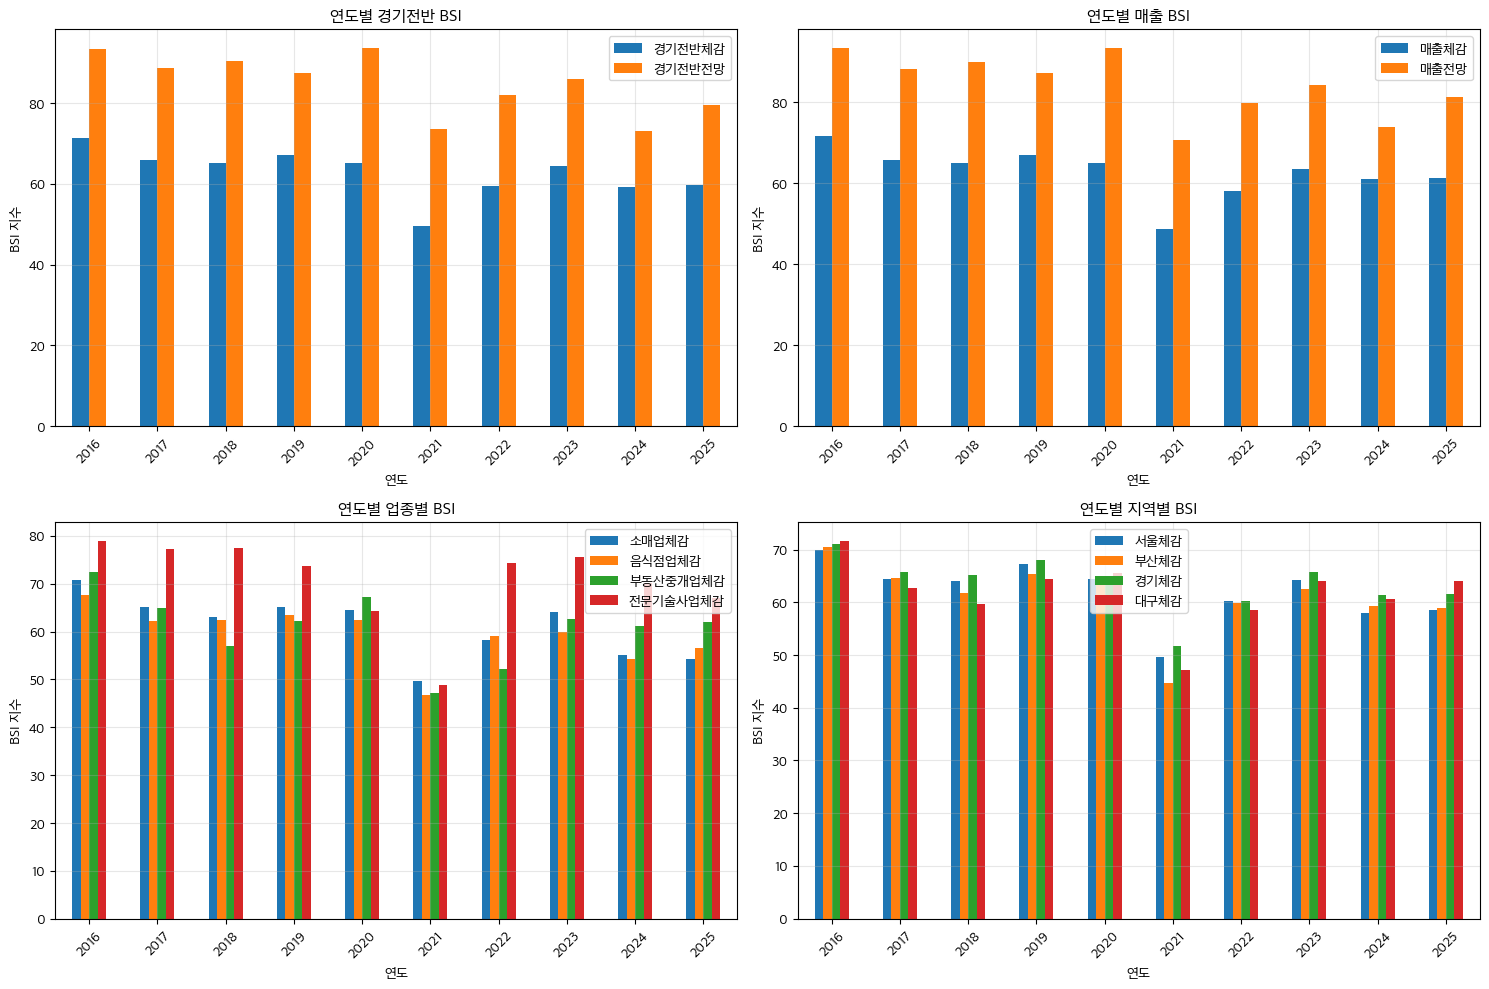

연도별 평균 BSI:
         경기전반체감     경기전반전망       매출체감       매출전망
연도                                              
2016  71.266667  93.433333  71.766667  93.333333
2017  66.000000  88.791667  65.650000  88.166667
2018  65.275000  90.383333  65.041667  90.066667
2019  67.158333  87.391667  66.958333  87.291667
2020  65.275000  93.608333  64.950000  93.366667
2021  49.616667  73.483333  48.608333  70.658333
2022  59.416667  81.958333  58.175000  79.808333
2023  64.425000  85.875000  63.491667  84.316667
2024  59.150000  73.208333  60.991667  73.941667
2025  59.800000  79.620000  61.260000  81.200000



In [7]:
# 4. 연도별 분석
def analyze_yearly_trends():
    print("=== 4. 연도별 분석 ===")
    
    # 연도별 평균 계산
    yearly_avg = bsi_df.groupby('연도')[['경기전반체감', '경기전반전망', '매출체감', '매출전망']].mean()
    
    # 시각화
    plt.figure(figsize=(15, 10))
    
    # 1-1. 연도별 경기전반
    plt.subplot(2, 2, 1)
    yearly_avg[['경기전반체감', '경기전반전망']].plot(kind='bar', ax=plt.gca())
    plt.title('연도별 경기전반 BSI', fontweight='bold')
    plt.xlabel('연도')
    plt.ylabel('BSI 지수')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # 1-2. 연도별 매출
    plt.subplot(2, 2, 2)
    yearly_avg[['매출체감', '매출전망']].plot(kind='bar', ax=plt.gca())
    plt.title('연도별 매출 BSI', fontweight='bold')
    plt.xlabel('연도')
    plt.ylabel('BSI 지수')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # 1-3. 연도별 업종별 평균
    industry_yearly = bsi_df.groupby('연도')[['소매업체감', '음식점업체감', '부동산중개업체감', '전문기술사업체감']].mean()
    plt.subplot(2, 2, 3)
    industry_yearly.plot(kind='bar', ax=plt.gca())
    plt.title('연도별 업종별 BSI', fontweight='bold')
    plt.xlabel('연도')
    plt.ylabel('BSI 지수')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # 1-4. 연도별 지역별 평균 (주요 지역)
    regional_yearly = bsi_df.groupby('연도')[['서울체감', '부산체감', '경기체감', '대구체감']].mean()
    plt.subplot(2, 2, 4)
    regional_yearly.plot(kind='bar', ax=plt.gca())
    plt.title('연도별 지역별 BSI', fontweight='bold')
    plt.xlabel('연도')
    plt.ylabel('BSI 지수')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("연도별 평균 BSI:")
    print(yearly_avg)
    print()

analyze_yearly_trends()

=== 5. 계절별 분석 ===


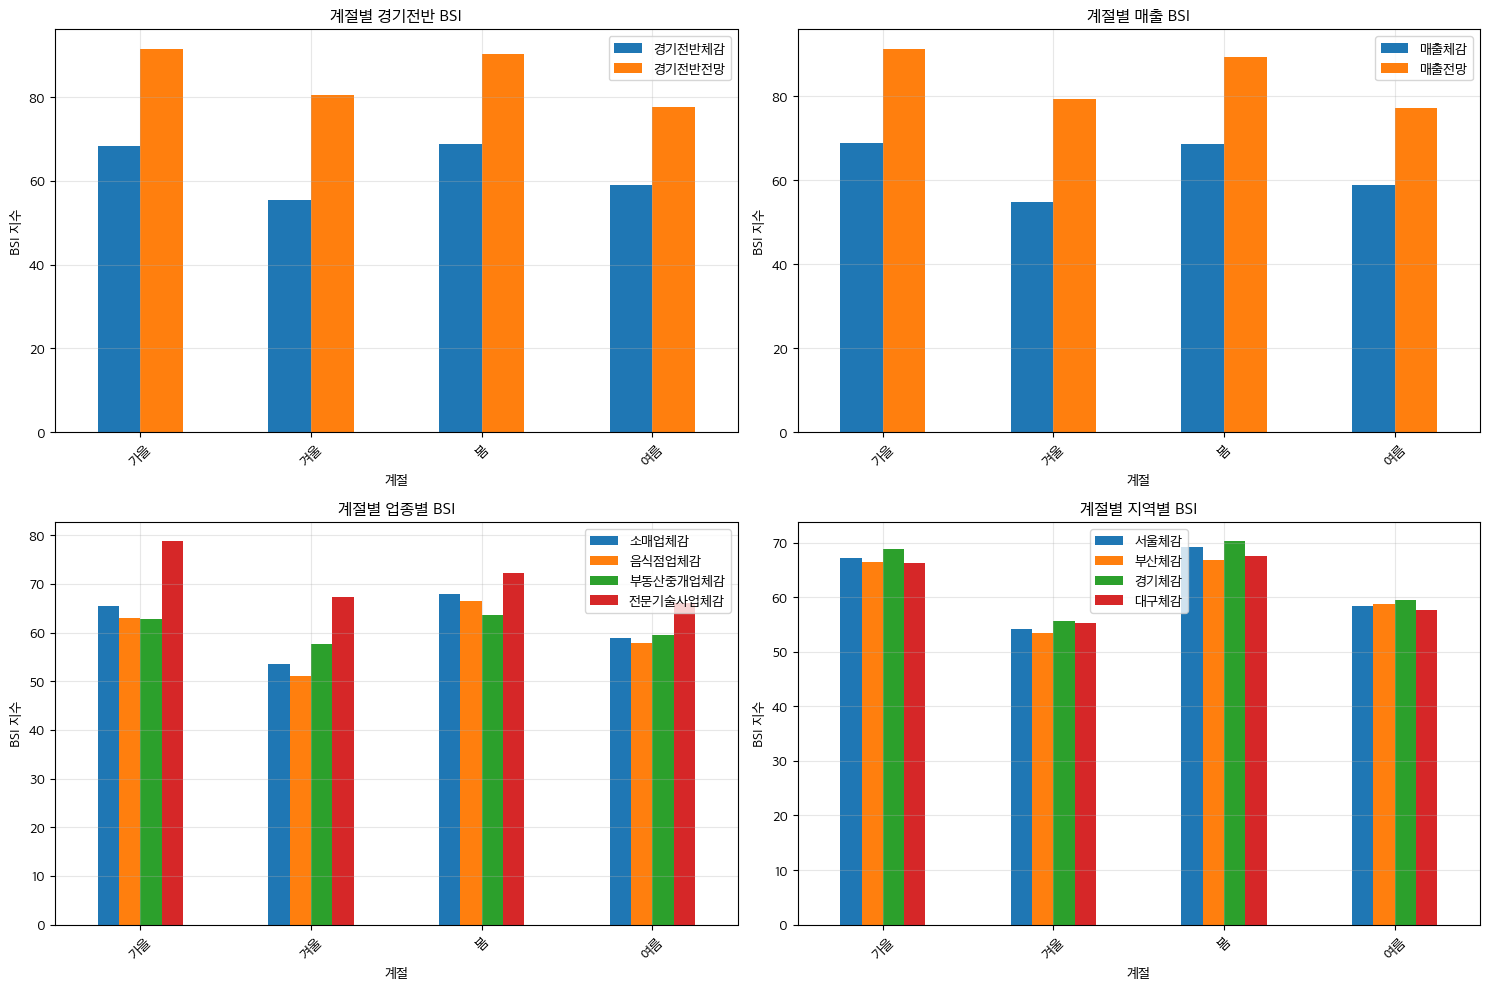

계절별 평균 BSI:
       경기전반체감     경기전반전망       매출체감       매출전망
계절                                            
가을  68.333333  91.592593  68.788889  91.392593
겨울  55.327586  80.537931  54.706897  79.465517
봄   68.860000  90.270000  68.586667  89.370000
여름  59.062963  77.740741  58.981481  77.192593



In [8]:
# 5. 계절별 분석
def analyze_seasonal_trends():
    print("=== 5. 계절별 분석 ===")
    
    # 계절 정의
    def get_season(month):
        if month in [3, 4, 5]:
            return '봄'
        elif month in [6, 7, 8]:
            return '여름'
        elif month in [9, 10, 11]:
            return '가을'
        else:
            return '겨울'
    
    # 계절 컬럼 추가
    bsi_df['계절'] = bsi_df['월'].apply(get_season)
    
    # 계절별 평균 계산
    seasonal_avg = bsi_df.groupby('계절')[['경기전반체감', '경기전반전망', '매출체감', '매출전망']].mean()
    
    # 시각화
    plt.figure(figsize=(15, 10))
    
    # 1-1. 계절별 경기전반
    plt.subplot(2, 2, 1)
    seasonal_avg[['경기전반체감', '경기전반전망']].plot(kind='bar', ax=plt.gca())
    plt.title('계절별 경기전반 BSI', fontweight='bold')
    plt.xlabel('계절')
    plt.ylabel('BSI 지수')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # 1-2. 계절별 매출
    plt.subplot(2, 2, 2)
    seasonal_avg[['매출체감', '매출전망']].plot(kind='bar', ax=plt.gca())
    plt.title('계절별 매출 BSI', fontweight='bold')
    plt.xlabel('계절')
    plt.ylabel('BSI 지수')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # 1-3. 계절별 업종별 평균
    industry_seasonal = bsi_df.groupby('계절')[['소매업체감', '음식점업체감', '부동산중개업체감', '전문기술사업체감']].mean()
    plt.subplot(2, 2, 3)
    industry_seasonal.plot(kind='bar', ax=plt.gca())
    plt.title('계절별 업종별 BSI', fontweight='bold')
    plt.xlabel('계절')
    plt.ylabel('BSI 지수')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # 1-4. 계절별 지역별 평균 (주요 지역)
    regional_seasonal = bsi_df.groupby('계절')[['서울체감', '부산체감', '경기체감', '대구체감']].mean()
    plt.subplot(2, 2, 4)
    regional_seasonal.plot(kind='bar', ax=plt.gca())
    plt.title('계절별 지역별 BSI', fontweight='bold')
    plt.xlabel('계절')
    plt.ylabel('BSI 지수')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("계절별 평균 BSI:")
    print(seasonal_avg)
    print()

analyze_seasonal_trends()

=== 6. 상관관계 분석 ===


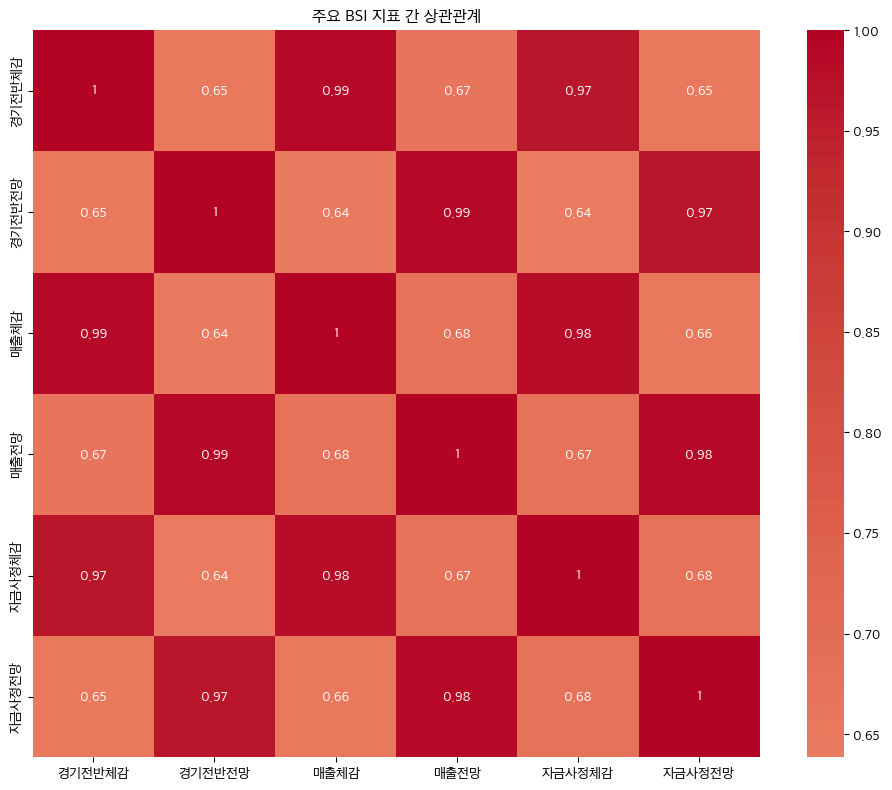

주요 지표 간 상관관계:
          경기전반체감    경기전반전망      매출체감      매출전망    자금사정체감    자금사정전망
경기전반체감  1.000000  0.652977  0.987104  0.672175  0.966313  0.650944
경기전반전망  0.652977  1.000000  0.644031  0.988444  0.638476  0.966032
매출체감    0.987104  0.644031  1.000000  0.675661  0.979807  0.655792
매출전망    0.672175  0.988444  0.675661  1.000000  0.674973  0.984686
자금사정체감  0.966313  0.638476  0.979807  0.674973  1.000000  0.680136
자금사정전망  0.650944  0.966032  0.655792  0.984686  0.680136  1.000000



In [9]:
# 6. 상관관계 분석
def analyze_correlations():
    print("=== 6. 상관관계 분석 ===")
    
    # 주요 지표들 간의 상관관계
    main_indicators = ['경기전반체감', '경기전반전망', '매출체감', '매출전망', '자금사정체감', '자금사정전망']
    
    # 상관관계 계산
    correlation_matrix = bsi_df[main_indicators].corr()
    
    # 시각화
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
    plt.title('주요 BSI 지표 간 상관관계', fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("주요 지표 간 상관관계:")
    print(correlation_matrix)
    print()

analyze_correlations()

=== 7. 최근 동향 분석 (2024-2025) ===


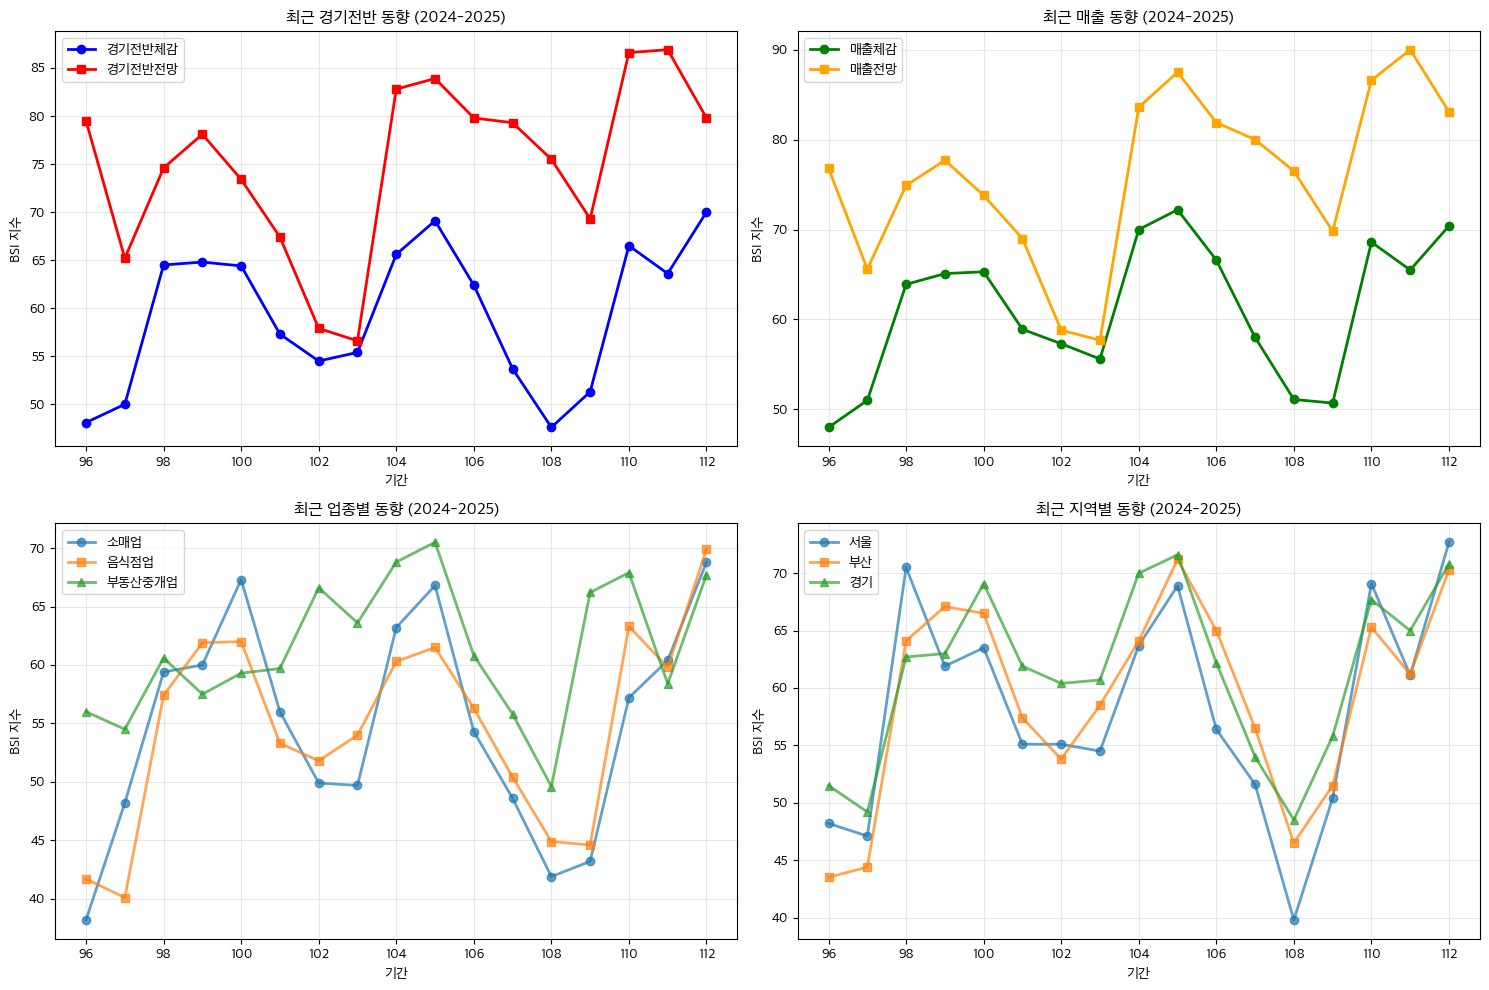

최근 동향 요약 (2024-2025):
경기전반체감 평균: 59.3
경기전반전망 평균: 75.1
매출체감 평균: 61.1
매출전망 평균: 76.1



In [10]:
# 7. 최근 동향 분석 (2024-2025)
def analyze_recent_trends():
    print("=== 7. 최근 동향 분석 (2024-2025) ===")
    
    # 2024-2025년 데이터만 필터링
    recent_df = bsi_df[bsi_df['연도'] >= 2024].copy()
    
    # 시각화
    plt.figure(figsize=(15, 10))
    
    # 1-1. 최근 경기전반 동향
    plt.subplot(2, 2, 1)
    plt.plot(recent_df.index, recent_df['경기전반체감'], marker='o', label='경기전반체감', linewidth=2, color='blue')
    plt.plot(recent_df.index, recent_df['경기전반전망'], marker='s', label='경기전반전망', linewidth=2, color='red')
    plt.title('최근 경기전반 동향 (2024-2025)', fontweight='bold')
    plt.xlabel('기간')
    plt.ylabel('BSI 지수')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 1-2. 최근 매출 동향
    plt.subplot(2, 2, 2)
    plt.plot(recent_df.index, recent_df['매출체감'], marker='o', label='매출체감', linewidth=2, color='green')
    plt.plot(recent_df.index, recent_df['매출전망'], marker='s', label='매출전망', linewidth=2, color='orange')
    plt.title('최근 매출 동향 (2024-2025)', fontweight='bold')
    plt.xlabel('기간')
    plt.ylabel('BSI 지수')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 1-3. 최근 업종별 동향
    plt.subplot(2, 2, 3)
    plt.plot(recent_df.index, recent_df['소매업체감'], marker='o', label='소매업', linewidth=2, alpha=0.7)
    plt.plot(recent_df.index, recent_df['음식점업체감'], marker='s', label='음식점업', linewidth=2, alpha=0.7)
    plt.plot(recent_df.index, recent_df['부동산중개업체감'], marker='^', label='부동산중개업', linewidth=2, alpha=0.7)
    plt.title('최근 업종별 동향 (2024-2025)', fontweight='bold')
    plt.xlabel('기간')
    plt.ylabel('BSI 지수')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 1-4. 최근 지역별 동향
    plt.subplot(2, 2, 4)
    plt.plot(recent_df.index, recent_df['서울체감'], marker='o', label='서울', linewidth=2, alpha=0.7)
    plt.plot(recent_df.index, recent_df['부산체감'], marker='s', label='부산', linewidth=2, alpha=0.7)
    plt.plot(recent_df.index, recent_df['경기체감'], marker='^', label='경기', linewidth=2, alpha=0.7)
    plt.title('최근 지역별 동향 (2024-2025)', fontweight='bold')
    plt.xlabel('기간')
    plt.ylabel('BSI 지수')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("최근 동향 요약 (2024-2025):")
    print(f"경기전반체감 평균: {recent_df['경기전반체감'].mean():.1f}")
    print(f"경기전반전망 평균: {recent_df['경기전반전망'].mean():.1f}")
    print(f"매출체감 평균: {recent_df['매출체감'].mean():.1f}")
    print(f"매출전망 평균: {recent_df['매출전망'].mean():.1f}")
    print()

analyze_recent_trends()

In [11]:
print("=== BSI 현황 분석 완료 ===")

print("전체 경기동향 추이: 경기전반, 매출, 자금사정의 체감과 전망 지수 분석")
print("업종별 경기동향: 소매업, 음식점업, 부동산중개업, 전문기술사업별 분석")
print("지역별 경기동향: 전국 17개 시도별 경기동향 비교 분석")
print("연도별 분석: 연도별 평균 BSI 지수 변화 추이")
print("계절별 분석: 봄/여름/가을/겨울별 계절적 패턴 분석")
print("상관관계 분석: 주요 BSI 지표들 간의 상관관계 분석")
print("최근 동향: 2024-2025년 최신 데이터를 활용한 최근 동향 분석")

=== BSI 현황 분석 완료 ===
전체 경기동향 추이: 경기전반, 매출, 자금사정의 체감과 전망 지수 분석
업종별 경기동향: 소매업, 음식점업, 부동산중개업, 전문기술사업별 분석
지역별 경기동향: 전국 17개 시도별 경기동향 비교 분석
연도별 분석: 연도별 평균 BSI 지수 변화 추이
계절별 분석: 봄/여름/가을/겨울별 계절적 패턴 분석
상관관계 분석: 주요 BSI 지표들 간의 상관관계 분석
최근 동향: 2024-2025년 최신 데이터를 활용한 최근 동향 분석
